In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load the data
file_path = r'C:\Users\HP\OneDrive\Desktop\Coding\Gpay\data\extracted_transactions.csv' # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


  Transaction Type         Payee  Amount     Account        Date          Time
0             Paid  Dhinakaran K    40.0  XXXXXX6411  19-10-2024  12:10:58 IST
1             Paid      ANANDHAN    65.0  XXXXXX6411  18-10-2024  12:04:16 IST
2             Paid      ANANDHAN    60.0  XXXXXX6411  17-10-2024  13:22:18 IST
3             Paid      ANANDHAN    10.0  XXXXXX6411  15-10-2024  19:14:24 IST
4             Paid      ANANDHAN    10.0  XXXXXX6411  15-10-2024  19:13:54 IST


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Type  435 non-null    object 
 1   Payee             309 non-null    object 
 2   Amount            435 non-null    float64
 3   Account           405 non-null    object 
 4   Date              435 non-null    object 
 5   Time              435 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.5+ KB


In [8]:
data.describe()

,Amount
count,435.000000
mean,328.237655
std,1247.500894
min,1.000000
25%,40.000000
50%,70.000000
75%,159.500000
max,20000.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

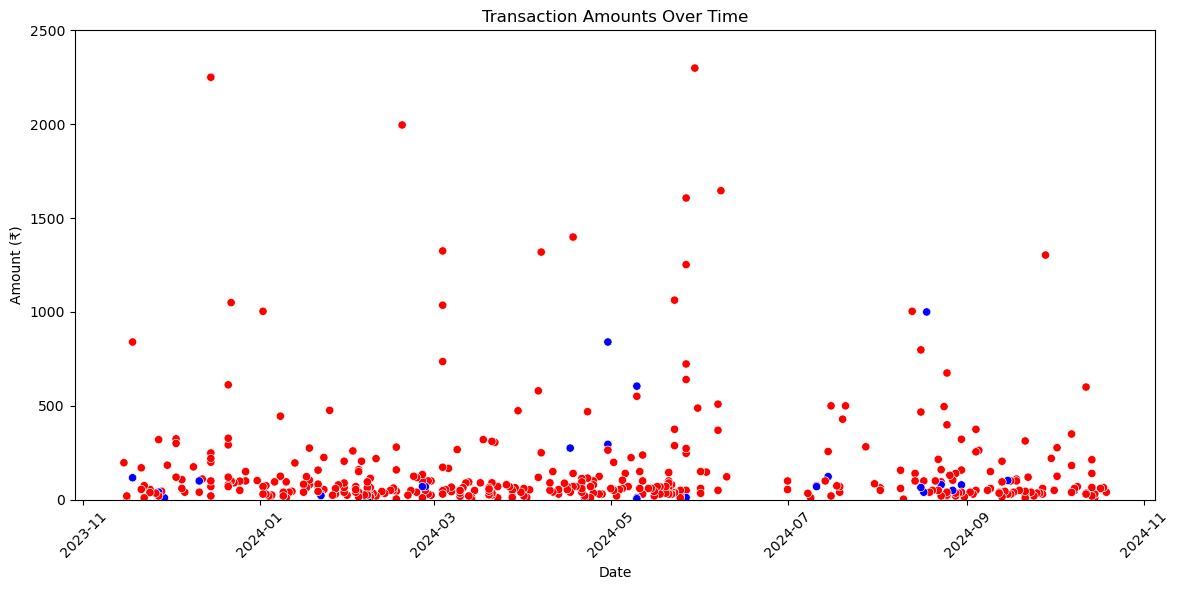

In [7]:

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column for color coding based on the transaction type
data['Color'] = data['Transaction Type'].apply(lambda x: 'red' if x in ['Paid', 'Sent'] else 'blue')

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot using Seaborn with hue for color coding
sns.scatterplot(data=data, x='Date', y='Amount', hue='Color', palette={'red': 'red', 'blue': 'blue'}, legend=None)

# Set titles and labels
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (₹)')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout for better fitting
plt.ylim(0, 2500)
# Show the plot
plt.show()

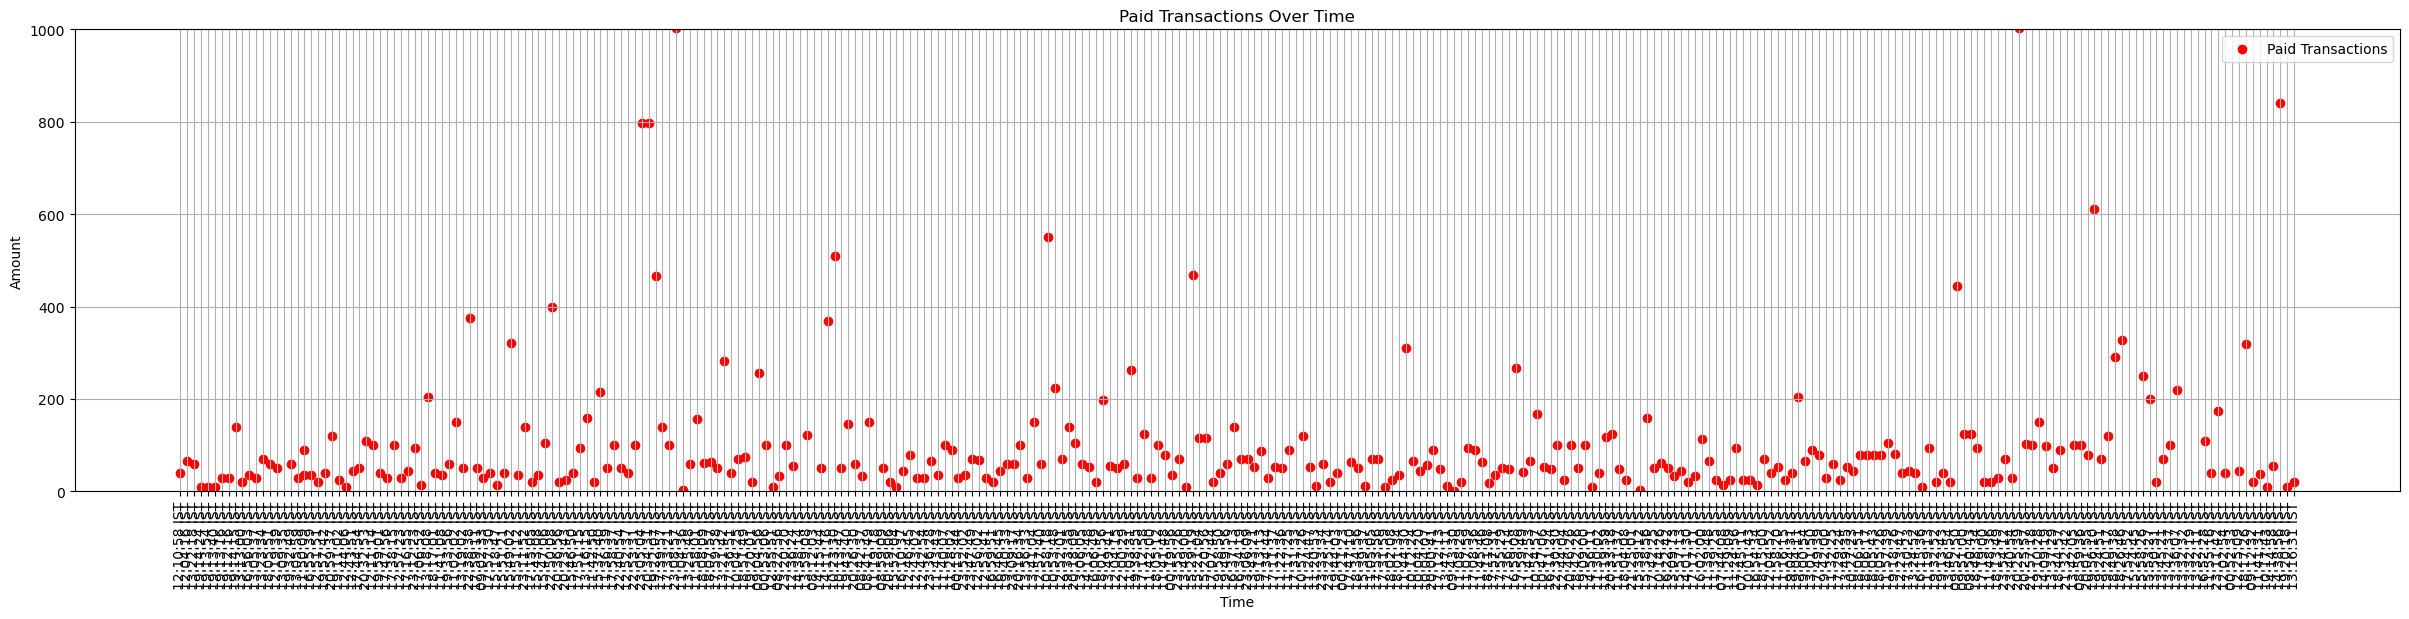

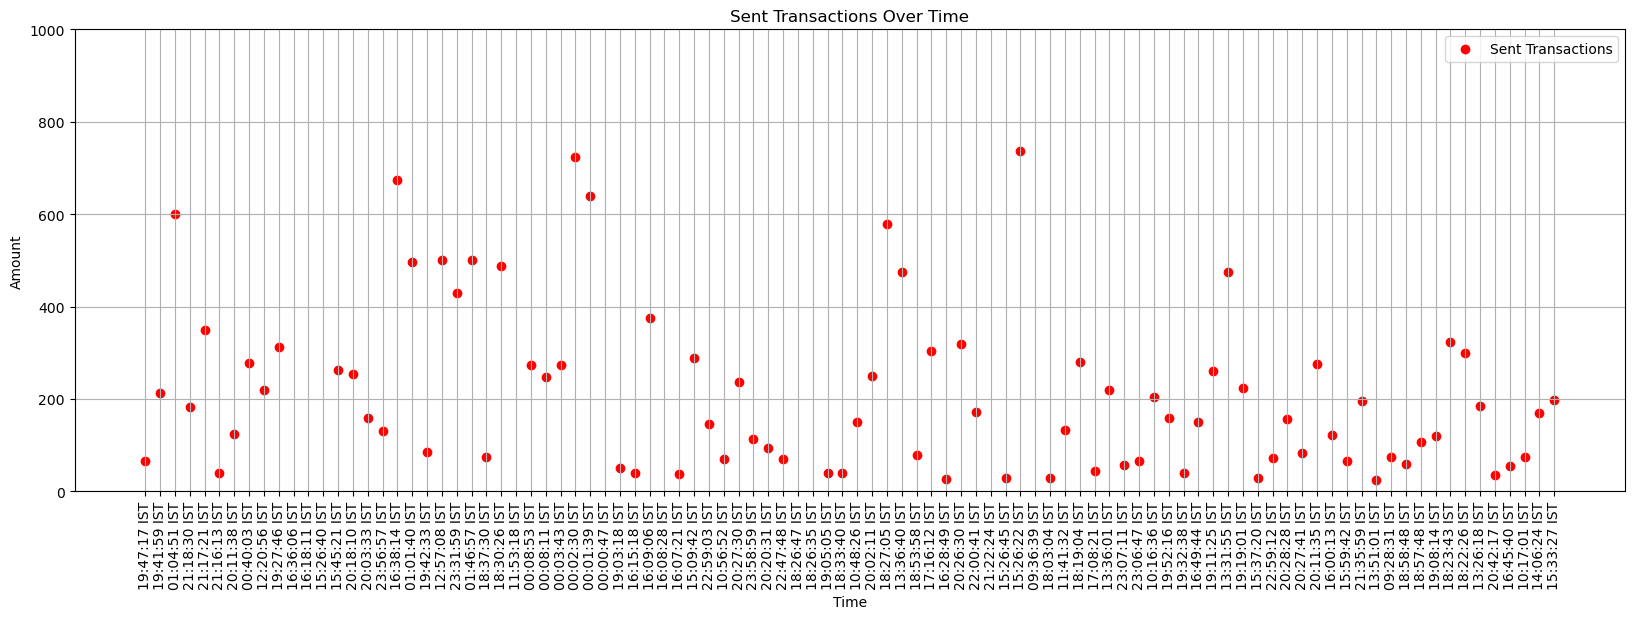

In [12]:

# Filter out "Paid" and "Sent" transactions
paid_transactions = data[data['Transaction Type'] == 'Paid']
sent_transactions = data[data['Transaction Type'] == 'Sent']

# Plot the Paid transactions
plt.figure(figsize=(30, 6))
plt.scatter(paid_transactions['Time'], paid_transactions['Amount'], color='red', label='Paid Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Paid Transactions Over Time')
plt.legend()
plt.ylim(0, 1000)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Plot the Sent transactions
plt.figure(figsize=(20, 6))
plt.scatter(sent_transactions['Time'], sent_transactions['Amount'], color='red', label='Sent Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Sent Transactions Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.ylim(0, 1000)
plt.grid(True)
plt.show()

In [13]:



# Group the data by 1-hour intervals
grouped_data = data.groupby(pd.Grouper(key='Time', freq='H')).sum()

# Now plot using the grouped data
plt.plot(grouped_data.index, grouped_data['Amount'], marker='o')
plt.xticks(rotation=45)
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [14]:
# Assuming you have a 'Date' column in your DataFrame with the full date information

# Combine 'Date' and 'Time' into a new datetime column
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

# Group by 1-hour intervals using the new 'DateTime' column
grouped_data = data.groupby(pd.Grouper(key='DateTime', freq='H')).sum()

# Now plot using the grouped data
plt.plot(grouped_data.index, grouped_data['Amount'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Amount')
plt.title('Hourly Amounts')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19876\3976656037.py:4: FutureWarning: Parsed string "2024-10-19 12:10:58 IST" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))


TypeError: datetime64 type does not support sum operations